In [38]:
from pyforest import *
import warnings
warnings.filterwarnings('ignore')

In [39]:
data = pd.read_csv("data\customer_booking.csv",encoding='ISO-8859-1')
data.head()

<IPython.core.display.Javascript object>

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [40]:
df = data.copy()
df.shape


(50000, 14)

In [41]:
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

## Encoding and Normalization

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [43]:
mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df.flight_day = df.flight_day.map(mapping)

In [44]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [46]:
#create a standard scaler object
scaler = StandardScaler()

norm_df = df[['num_passengers','purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day','wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration']]

#fit and transform the data
scaled_df = scaler.fit_transform(norm_df)

<IPython.core.display.Javascript object>

In [47]:
scaled_df = pd.DataFrame(scaled_df,columns = norm_df.columns)
scaled_df

<IPython.core.display.Javascript object>

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,0.400684,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175
1,-0.579559,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175
2,0.400684,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175
3,-0.579559,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175
4,0.400684,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175
...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,1.096754,0.703747,-0.649919,1.158082,-1.107368
49996,-0.579559,0.288108,-0.502977,-0.936026,1.598567,-1.420965,-0.649919,-0.863497,-1.107368
49997,-0.579559,-0.673744,-0.502977,2.389544,1.096754,-1.420965,-0.649919,1.158082,-1.107368
49998,-0.579559,-0.773246,-0.502977,0.357251,-1.412314,0.703747,-0.649919,1.158082,-1.107368


In [52]:
categ_df = df[['sales_channel', 'trip_type']]
encoded_df = pd.get_dummies(categ_df)
encoded_df

<IPython.core.display.Javascript object>

,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,True,False,False,False,True
1,True,False,False,False,True
2,True,False,False,False,True
3,True,False,False,False,True
4,True,False,False,False,True
...,...,...,...,...,...
49995,True,False,False,False,True
49996,True,False,False,False,True
49997,True,False,False,False,True
49998,True,False,False,False,True


In [53]:
final_df = pd.concat([scaled_df,encoded_df,df["booking_complete"]],axis=1)
final_df

<IPython.core.display.Javascript object>

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,booking_complete
0,0.400684,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,True,False,False,False,True,0
1,-0.579559,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,True,False,False,False,True,0
2,0.400684,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,True,False,False,False,True,0
3,-0.579559,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,True,False,False,False,True,0
4,0.400684,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,1.096754,0.703747,-0.649919,1.158082,-1.107368,True,False,False,False,True,0
49996,-0.579559,0.288108,-0.502977,-0.936026,1.598567,-1.420965,-0.649919,-0.863497,-1.107368,True,False,False,False,True,0
49997,-0.579559,-0.673744,-0.502977,2.389544,1.096754,-1.420965,-0.649919,1.158082,-1.107368,True,False,False,False,True,0
49998,-0.579559,-0.773246,-0.502977,0.357251,-1.412314,0.703747,-0.649919,1.158082,-1.107368,True,False,False,False,True,0


In [54]:
final_df["booking_complete"].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

## corelations

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

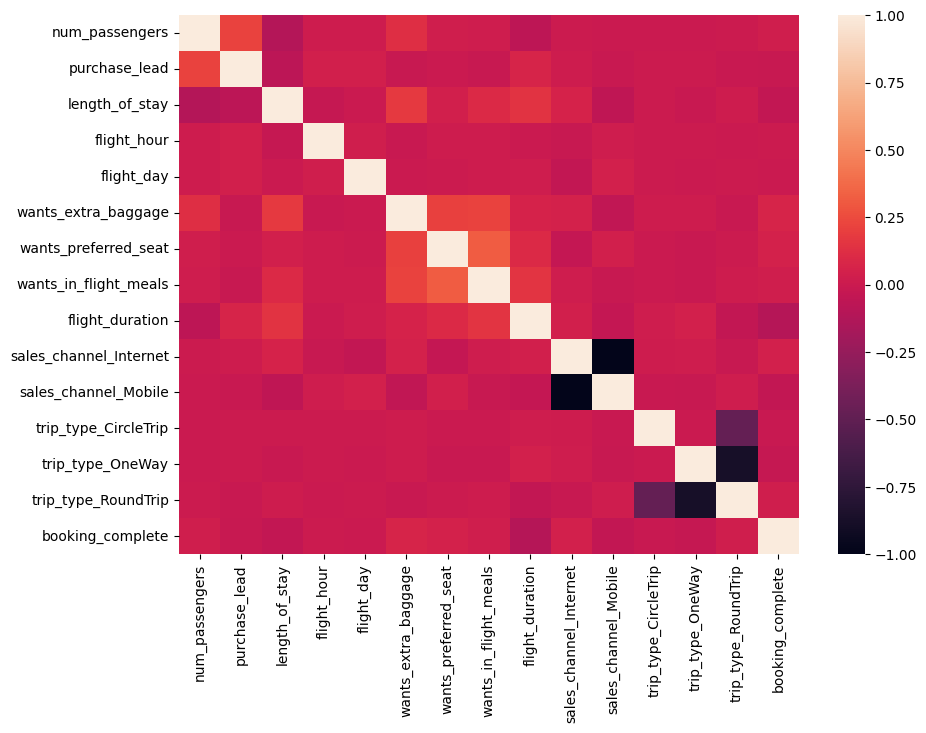

In [55]:
corr = final_df.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(corr)

## Sampling

In [59]:
# Under Sampling
from imblearn.under_sampling import RandomUnderSampler
# Separate the input features (X) and the target labels (y)
x = final_df.drop('booking_complete', axis=1)  # assuming 'target' is the label column
y = final_df['booking_complete']

# Perform undersampling
rus = RandomUnderSampler(sampling_strategy='auto')  # auto matches the minority class
x_res, y_res = rus.fit_resample(x, y)

# Check the new class distribution
print(y_res.value_counts())

booking_complete
0    7478
1    7478
Name: count, dtype: int64


In [71]:
y_res.shape

(14956,)

## Random Forest Classifier

In [74]:
X_train,X_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.25)

<IPython.core.display.Javascript object>

In [75]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

In [78]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' handles multiclass
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

Accuracy: 0.6261032361594009
Precision: 0.6260897096347202
Recall: 0.6261032361594009


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

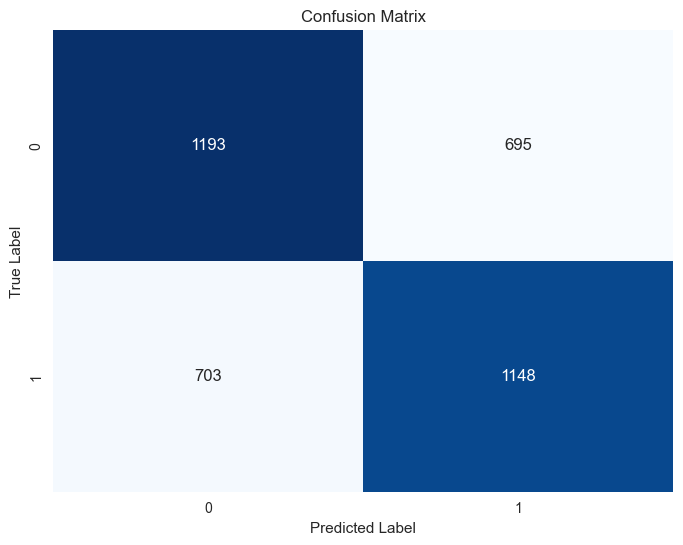

In [79]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(len(set(y))), yticklabels=range(len(set(y))))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

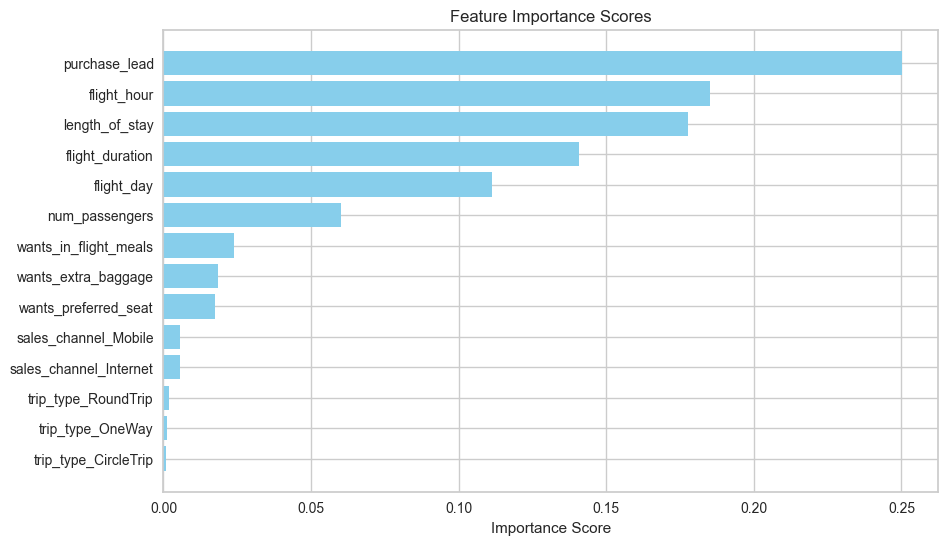

In [82]:
# Get feature importance scores
importances = clf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': final_df.drop("booking_complete",axis=1).columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()